# Haberman's Survival Dataset

#### A simple dataset contaning cases from a study conducted between 1958 and 1970. The study was conducted at the University of Chicago's Bilings Hospital. The study is on the survival of patients who had undergone surgery for breast cancer.

#### Number of Instances: 306
#### Number of Attributes: 4

#### Attribute Information:

    A) Age of patient at time of operation (Age)
    
    B) Patient's year of operation (Op_Year)
    
    C) Number of positive axillary nodes detected (axil_nodes)
    
    D)Survival status (class attribute) 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year (Surv_status)

In [3]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

'''downloaded the haberman dataset from "https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1" '''
#Load haberman.csv into the pandas dataFrame
haberman=pd.read_csv("/content/haberman.csv")

In [4]:
#no. of rows and columns
print(haberman.shape)

(306, 4)


In [5]:
#the columns in our dataset
print(haberman.columns)

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')


In [6]:
#no. of data-points for each class are present
haberman["Surv_status"].value_counts()

,count
Surv_status,
1,225
2,81


Observation(s):

1) The dataset is not balanced. From total 306 people, 255 people suvived for 5 or more year and 81 of them died within 5 years. So 225:81 is not a balanced pair.

# 2-D Scatter plot

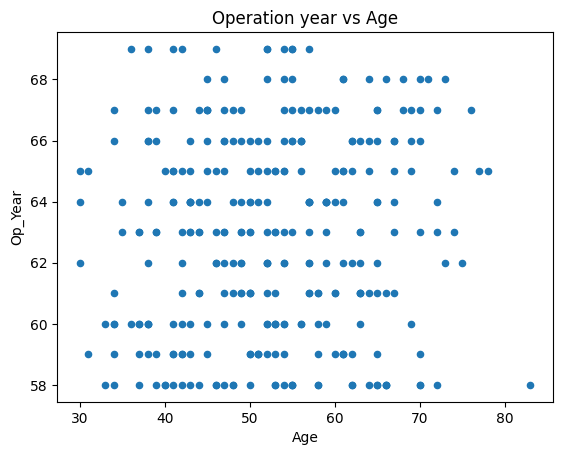

In [7]:
#2-D scatter plot
haberman.plot(kind='scatter',x='Age',y='Op_Year')
plt.title('Operation year vs Age')
plt.show()

Observation(s):

1) This scatter plot does not give any clear insights. The dataset is highly mixed up. But we can infer that majority operations were performed for age range between 40 and 70, because most of the points are plotted in that interval.

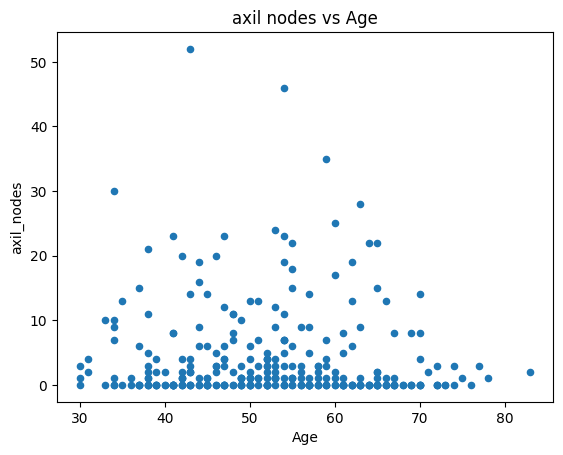

In [8]:
haberman.plot(kind='scatter',x='Age',y='axil_nodes')
plt.title('axil nodes vs Age')
plt.show()

Observation(s):

1) There are many data-points for the axil_nodes of value 0, therefore we can say that most of the people had 0 axil nodes.

2) There are very less data-points for the axil_nodes above the value 30, therefore we can say that very less people had 30 axil nodes.

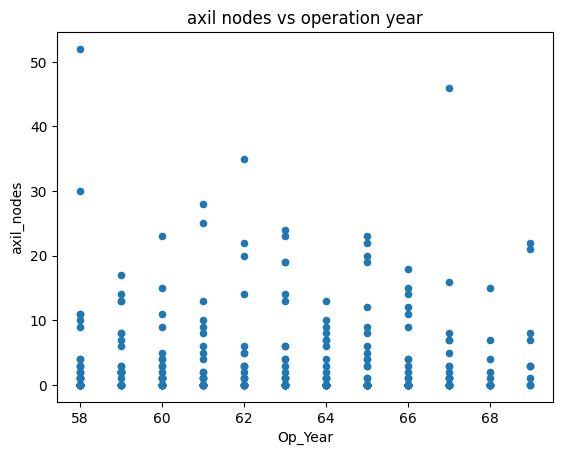

In [9]:
haberman.plot(kind='scatter',x='Op_Year',y='axil_nodes')
plt.title('axil nodes vs operation year')
plt.show()

Observation(s):

1) We can say that most of the operations take place between the year 1960 and 1966.

2) We can say that very less operations took place for people having more than 20 axil nodes.

3) We can say that most of the operations took place for people having axil nodes in the range 0 to 10.

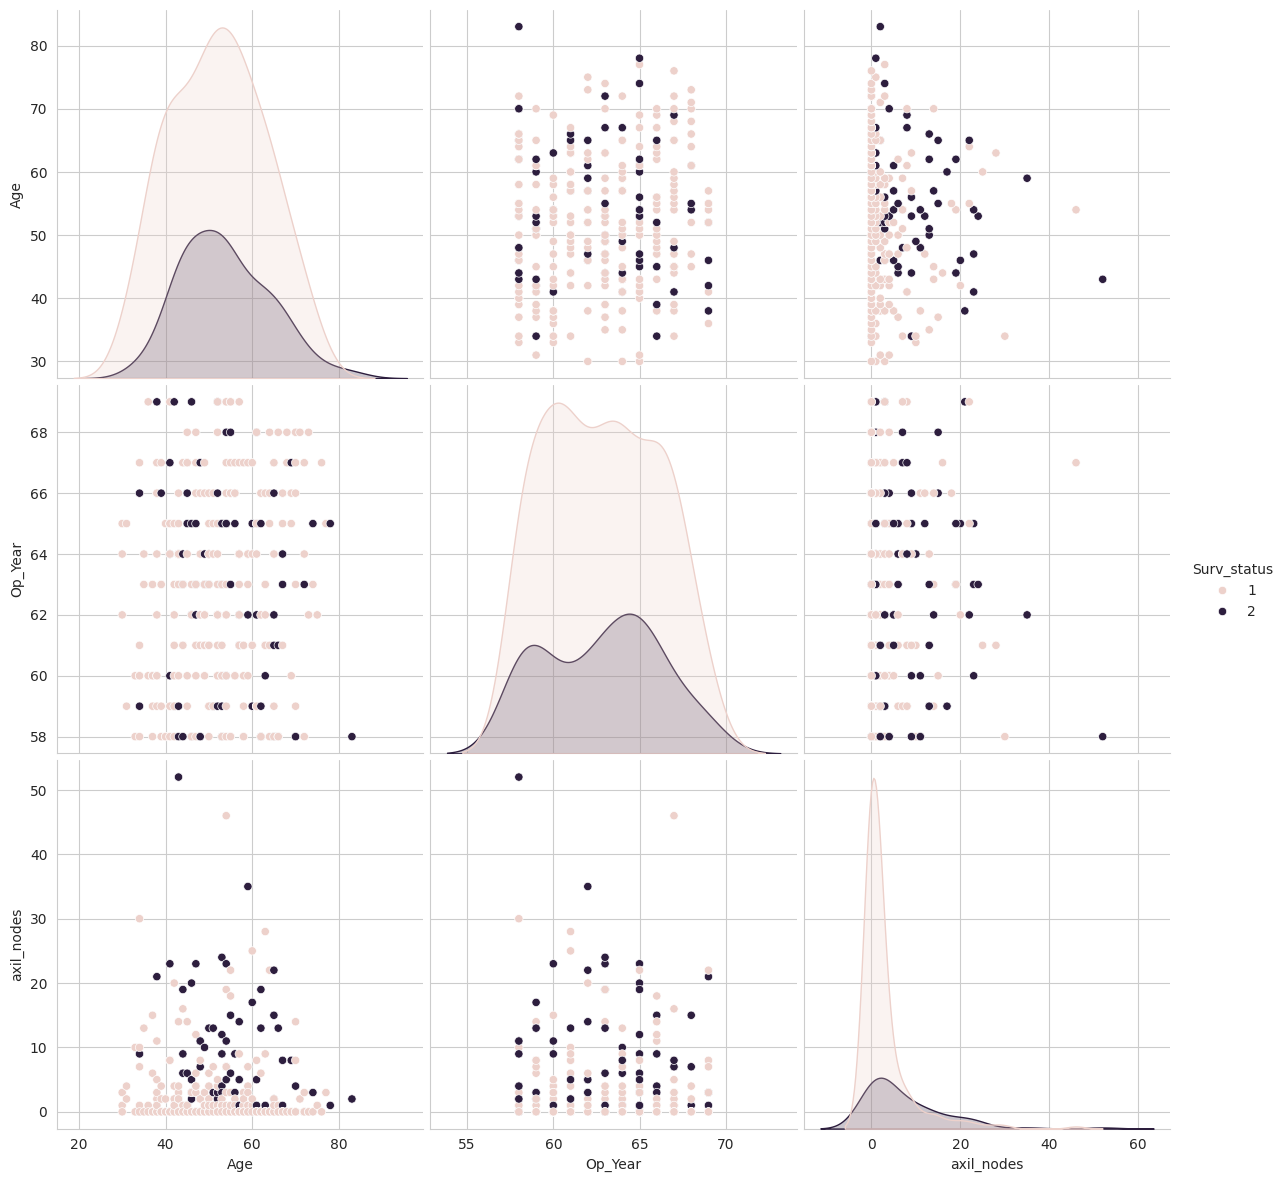

In [10]:
plt.close();
sns.set_style('whitegrid')
sns.pairplot(haberman, hue = 'Surv_status', height = 4)
plt.show()

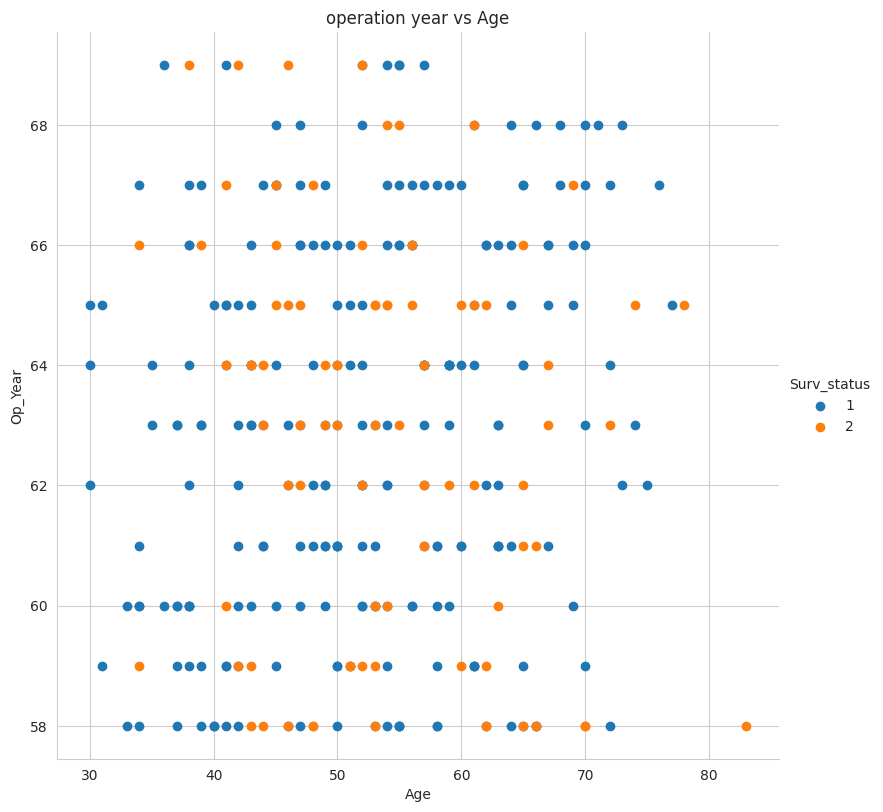

In [11]:
#2-D scatter plot with color-coding for each class
#here 'sns' corresponds to seaborn

sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='Surv_status',height=8)\
   .map(plt.scatter,"Age","Op_Year")\
   .add_legend()
plt.title("operation year vs Age")
plt.show()

Observation(s):

1) Using Age and Op_Year features, we cannot distinguish the survival status.

2) It is harder to distinguish the classes using these 2 features as they are overlapping a lot.

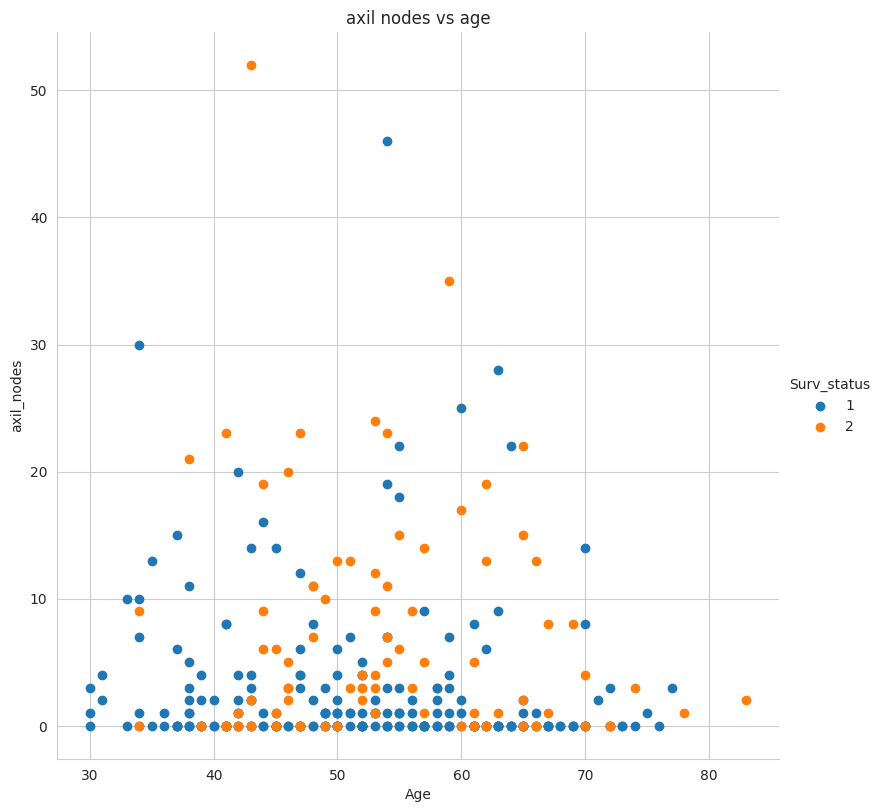

In [12]:
#plot between "age" and "axil_nodes"
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='Surv_status',height=8)\
   .map(plt.scatter,"Age","axil_nodes")\
   .add_legend()
plt.title("axil nodes vs age")
plt.show()

Observation(s):

1) We can get an insight that most of the people who had axil node value as 0 survived irrespective of the age.

2) We can also say that poeple with age greater than 50 and having axil nodes value greater than 10 were likely not to survive.

3) We can say that most of the people between the age range 30 and 40 survived.

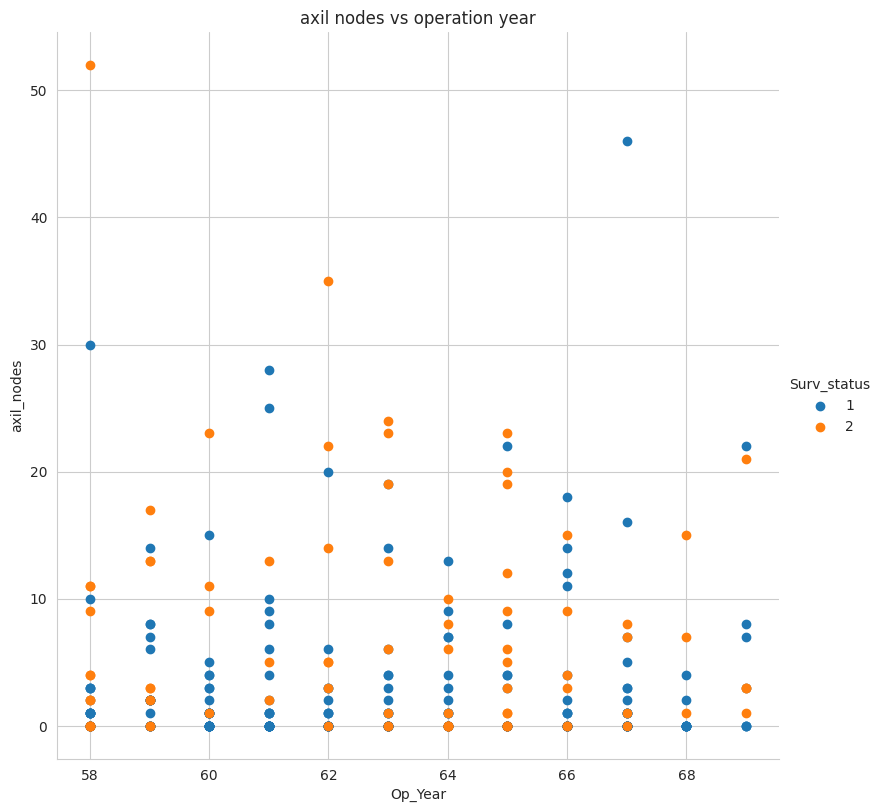

In [13]:
#plot between "Op_Year" and "axil_nodes"
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='Surv_status',height=8)\
   .map(plt.scatter,"Op_Year","axil_nodes")\
   .add_legend()
plt.title("axil nodes vs operation year")
plt.show()

Observation(s):

1) We can get an insight that people did not survive who had axil nodes value as 0 between the year 1962 and 1967.

2) We can say that in the year 1961, most of the people survived.

3) We can also get an insight that in the year 1965, most of the operations were unsuccesful and people died.

# Histogram, PDF, CDF

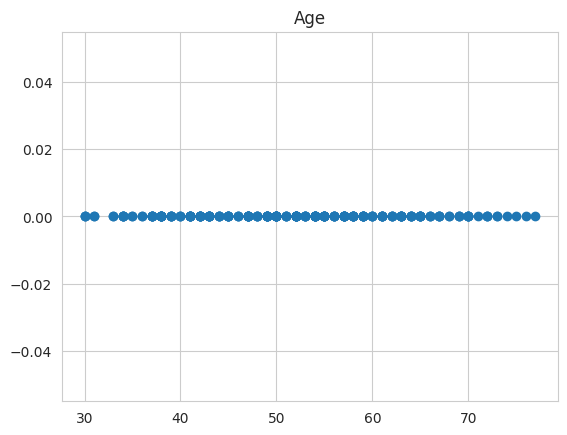

In [14]:
#1-D scatter plot using just one feature
haberman_survived=haberman.loc[haberman["Surv_status"]==1]
haberman_dead=haberman.loc[haberman["Surv_status"]==0]
plt.plot(haberman_survived["Age"], np.zeros_like(haberman_survived["Age"]),'o')
plt.plot(haberman_dead["Age"], np.zeros_like(haberman_dead["Age"]),'o')
plt.title("Age")
plt.show()

Observation(s):

1) We cannot get any insights from this kind of 1-D plot.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


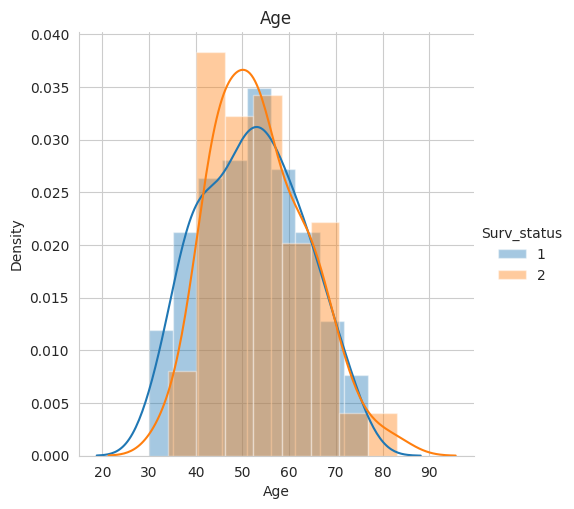

In [15]:
#better way of visualising 1-D scatter plots is using PDF
sns.FacetGrid(haberman, hue="Surv_status", height = 5) \
    .map(sns.distplot, "Age") \
    .add_legend()
plt.title("Age")
plt.show()

#smooth line is PDF, i.e smoothen out histogram

Observation(s):

1) We can say that people within the range of age 40 and 60 are more likely to die.

2) We can say that people in the age range of 20-40 are more likely to survive.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


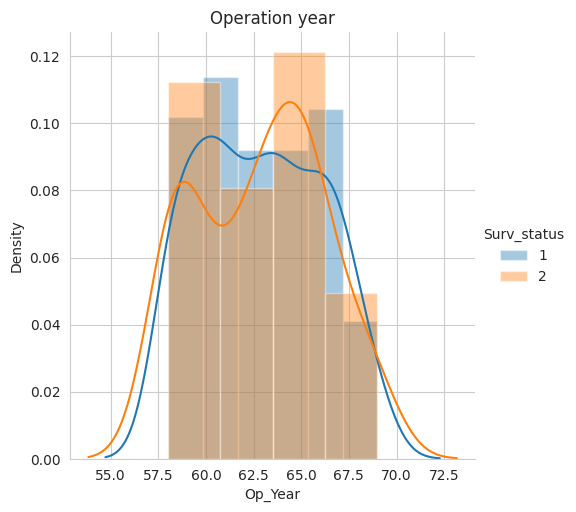

In [16]:
sns.FacetGrid(haberman, hue="Surv_status", height = 5) \
    .map(sns.distplot, "Op_Year") \
    .add_legend()
plt.title("Operation year")
plt.show()

Observation(s):

1) We can say that most of the people who were operated between the years 1960-1965 died.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


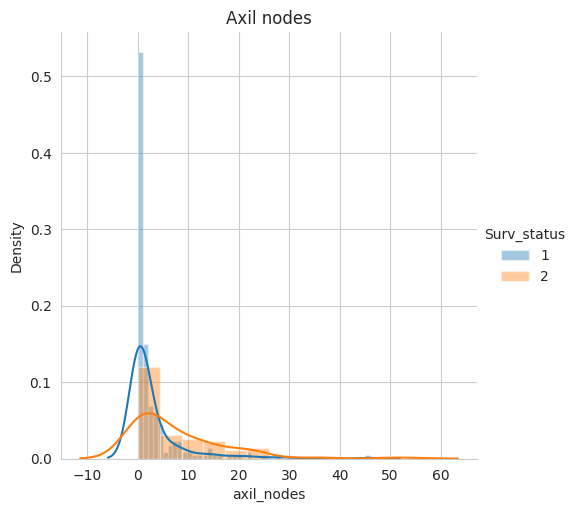

In [17]:
sns.FacetGrid(haberman, hue="Surv_status", height = 5) \
    .map(sns.distplot, "axil_nodes") \
    .add_legend()
plt.title("Axil nodes")
plt.show()

Observation(s):

1) We can say that the people who has axil nodes value in the range 0-10 were more likely to survive.

2) We can also say that people who has axil nodes value greater than 30 were less likely to survive.

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]


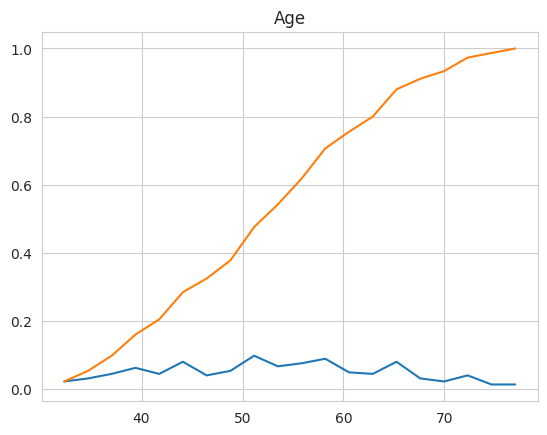

In [18]:
#We use CDF to visually see the percentage of particular class wrt a feature
#blue is cdf
#orange is pdf


#survived
counts, bin_edges = np.histogram(haberman_survived["Age"], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("Age")
plt.show()

Observation(s):

1) cdf at 60 would tell the percentage of people who survived that have age less than 60.

2) pdf at 60 would tell the percentage of ppeople who survived that have age 60.

[0.10666667 0.08       0.         0.10666667 0.         0.10222222
 0.         0.07111111 0.         0.09777778 0.10222222 0.
 0.06666667 0.         0.09777778 0.         0.09333333 0.
 0.04444444 0.03111111]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]


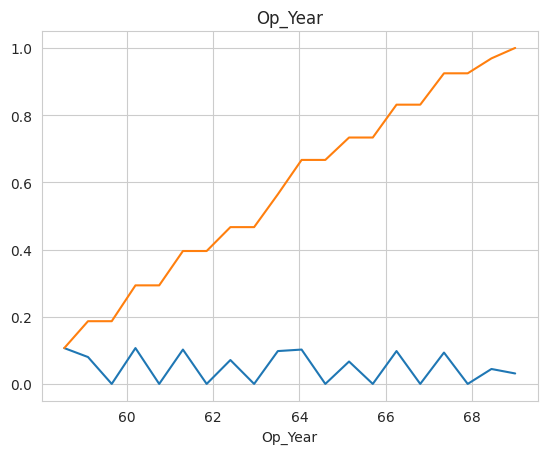

In [19]:
counts, bin_edges = np.histogram(haberman_survived["Op_Year"], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Op_Year")
plt.title("Op_Year")
plt.show()

[0.73333333 0.10222222 0.02666667 0.05333333 0.01333333 0.00888889
 0.02222222 0.00444444 0.00888889 0.00888889 0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.00444444]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]


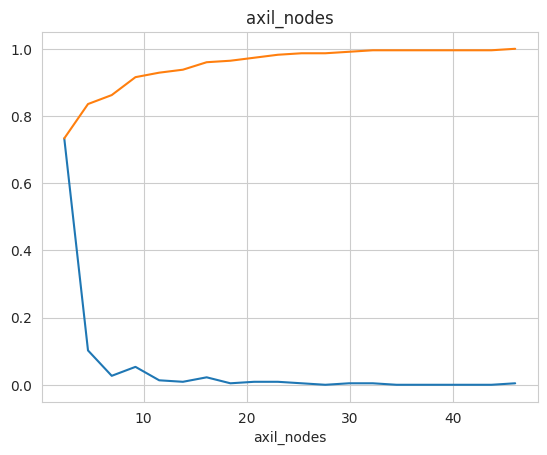

In [20]:
counts, bin_edges = np.histogram(haberman_survived["axil_nodes"], bins=20, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("axil_nodes")
plt.title("axil_nodes")
plt.show()

# Box plot and whiskers

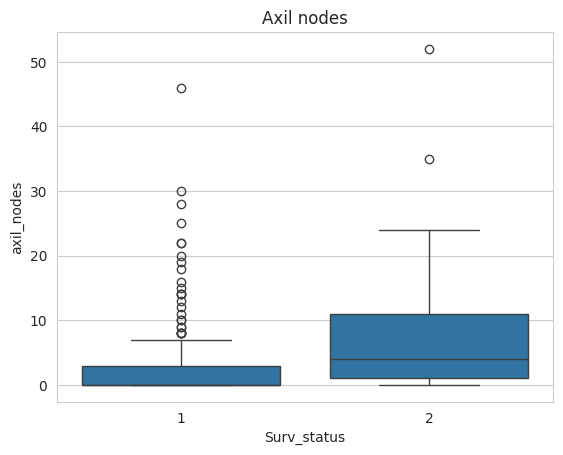

In [21]:
#Box plot with whiskers is another method of visualising 1-D scatter plot
#Box plot can be visualised as PDF on the side-ways

sns.boxplot(x="Surv_status", y = "axil_nodes", data=haberman)
plt.title("Axil nodes")
plt.show()

Observation(s):

1) We can get an insight that more no. of axil node value, more likely the person will die.

2) Patients who had axil nodes value as 0 were more likely to survive.

3) Patients who had axil nodes value between 1-22 were more likely to die.

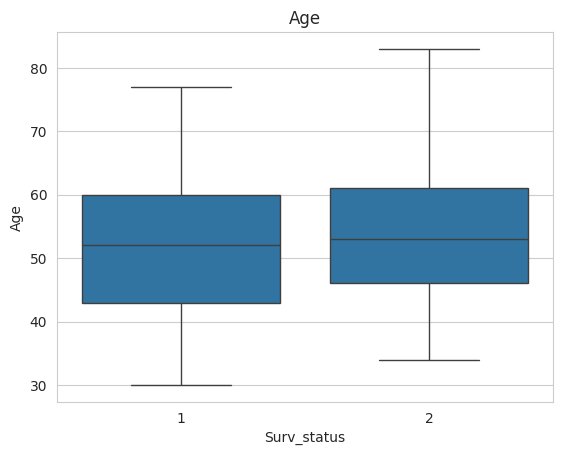

In [22]:
sns.boxplot(x="Surv_status", y = "Age", data=haberman)
plt.title("Age")
plt.show()

Observation(s):

1)We can say that people between the age 42-45 were more ikely to survive.

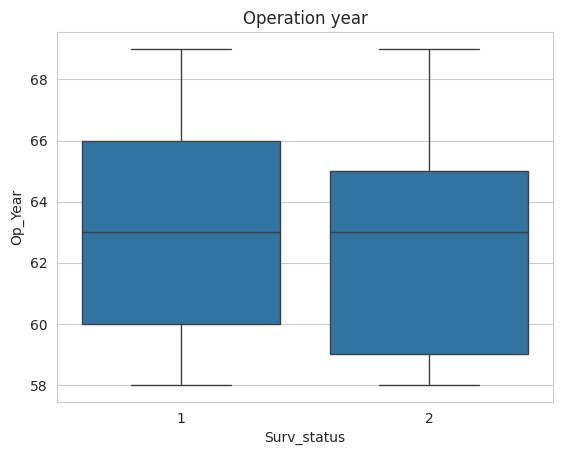

In [23]:
sns.boxplot(x="Surv_status", y = "Op_Year", data=haberman)
plt.title("Operation year")
plt.show()

Observation(s):

1) We can get an insight that people who were operated between the year 1959-1960 were more likely to die.

2) We can also say that people who were operated between the year 1965-1966 were more likely to survive.

# Violin plots

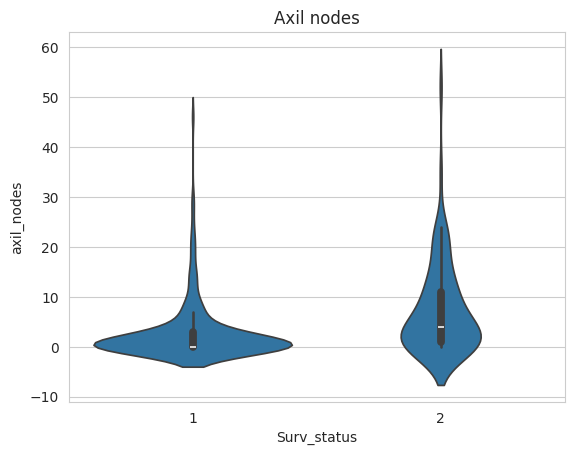

In [25]:
#A violin plot combines the benefits of the previous two plots and simplifies them
#the black thick region in middle is corresponding to the boxplot's pdf on the side
#denser regions of the data are fatter and sparser ones are thinner

sns.violinplot(x="Surv_status", y="axil_nodes", data = haberman)
plt.title("Axil nodes")
plt.show()

Observation(s):

1) We can say that for axil node value of 0, plot is denser and so people were more likely to survive for that value.

2) We can also say that for axil node value greater than equal to 1, people were more likely to die.

# Final conclusion

1) We can see that there is quite good concentration of data points when axil node value is 0.

2) We can say that there is less concentration of data points when axil node value is greater than 30.

3) We can say that most of the operations tooe place between the year 1960 and 1966.

4) We can say that very less operations took place for people having more than 20 axil nodes.

5) We can say that most of the operations took place for people having axil nodes in the range 0 to 10.

6) We can get an insight that most of the people who had axil node value as 0 survived irrespective of the age.

7) We can also say that poeple with age greater than 50 and having axil nodes value greater than 10 were likely not to survive.

8) We can say that most of the people between the age range 30 and 40 survived.

9) The majority of operations are performed on people age range between 38 and 68.

10) We can get an insight that people did not survive who had axil nodes value as 0 between the year 1962 and 1967.

11) We can say that in the year 1961, most of the people survived.

12) We can also get an insight that in the year 1965, most of the operations were unsuccesful and people died.

13) Patients who had axil nodes value as 0 were more likely to survive.

14) Patients who had axil nodes value between 1-22 were more likely to die.



Important findings regarding features:

1) Axil node value plays an important role and we can conclude that anyone who has an axil node value greater than 1 is more likely to die.
